# Assignment - 1

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

C:\Users\SMART\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8666 - loss: 0.4457 - val_accuracy: 0.9816 - val_loss: 0.0519
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9834 - loss: 0.0538 - val_accuracy: 0.9858 - val_loss: 0.0397
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9893 - loss: 0.0346 - val_accuracy: 0.9885 - val_loss: 0.0347
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9907 - loss: 0.0299 - val_accuracy: 0.9878 - val_loss: 0.0385
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9926 - loss: 0.0233 - val_accuracy: 0.9926 - val_loss: 0.0241
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9945 - loss: 0.0173 - val_accuracy: 0.9903 - val_loss: 0.0315
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9954 - loss: 0.0151 - val_accuracy: 0.9902 - val_loss: 0.0395
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9956 - loss: 0.0138 - val_accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9842 - loss: 0.0482
Test accuracy: 0.9891999959945679


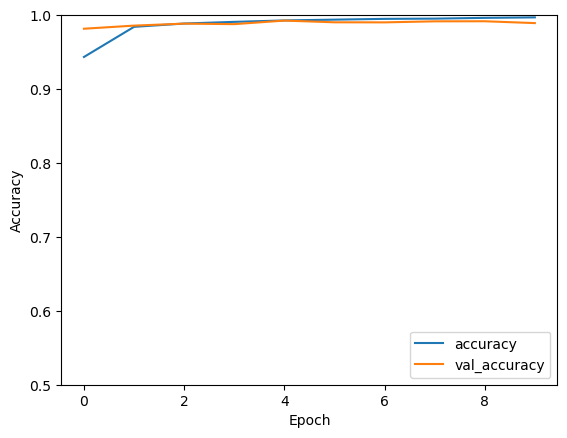

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'Test accuracy: {test_acc}')

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Assignment - 2

In [8]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [10]:
train_images = train_images.reshape((-1, 28, 28, 1)).astype('float32')
test_images = test_images.reshape((-1, 28, 28, 1)).astype('float32')

In [11]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)  
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [13]:
BATCH_SIZE = 64
train_dataset = train_dataset.shuffle(buffer_size=60000).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

In [14]:
logdir = "./logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

In [15]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(train_dataset,
                    epochs=10,
                    batch_size=BATCH_SIZE,
                    validation_data=test_dataset,
                    callbacks=[tensorboard_callback])

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8760 - loss: 0.4223 - val_accuracy: 0.9851 - val_loss: 0.0481
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9834 - loss: 0.0534 - val_accuracy: 0.9850 - val_loss: 0.0460
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9883 - loss: 0.0373 - val_accuracy: 0.9873 - val_loss: 0.0381
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9906 - loss: 0.0305 - val_accuracy: 0.9874 - val_loss: 0.0429
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9937 - loss: 0.0208 - val_accuracy: 0.9888 - val_loss: 0.0382
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9943 - loss: 0.0166 - val_accuracy: 0.9904 - val_loss: 0.0307
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9959 - loss: 0.0131 - val_accuracy: 0.9912 - val_loss: 0.0315
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9957 - loss: 0.0126 - val_accuracy:

# Assignment - 3

In [18]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [20]:
train_images = train_images.reshape((-1, 28, 28, 1)).astype('float32')
test_images = test_images.reshape((-1, 28, 28, 1)).astype('float32')

In [21]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [22]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
BATCH_SIZE = 20
num_epochs = 10

optimizer = tf.keras.optimizers.Adam()

for epoch in range(num_epochs):
    for batch_data, batch_labels in train_dataset:
        with tf.GradientTape() as tape:
            predictions = model(batch_data)
            loss = tf.keras.losses.categorical_crossentropy(batch_labels, predictions)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [30]:
history = model.fit(train_dataset,
                    epochs=num_epochs,
                    validation_data=test_dataset,
                    callbacks=[tensorboard_callback])

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9993 - loss: 0.0022 - val_accuracy: 0.9894 - val_loss: 0.1189
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9991 - loss: 0.0042 - val_accuracy: 0.9916 - val_loss: 0.0870
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9997 - loss: 9.0087e-04 - val_accuracy: 0.9911 - val_loss: 0.0970
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9993 - loss: 0.0029 - val_accuracy: 0.9922 - val_loss: 0.0816
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9994 - loss: 0.0015 - val_accuracy: 0.9926 - val_loss: 0.0883
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9996 - loss: 8.7106e-04 - val_accuracy: 0.9924 - val_loss: 0.0793
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9994 - loss: 0.0022 - val_accuracy: 0.9924 - val_loss: 0.0784
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9994 - loss: 0.0024 - va

# Assignment - 4

In [49]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

In [50]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [51]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

In [62]:
optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [63]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_fn(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

In [56]:
Epochs = 10

In [57]:
for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    for batch_images, batch_labels in tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(50000).batch(32):
        loss = train_step(batch_images, batch_labels)
        epoch_loss_avg.update_state(loss)
    print(f'Epoch {epoch + 1}, Loss: {epoch_loss_avg.result()}')

Epoch 1, Loss: 0.5444765686988831
Epoch 2, Loss: 0.5092561841011047
Epoch 3, Loss: 0.4814509451389313
Epoch 4, Loss: 0.4536246061325073
Epoch 5, Loss: 0.4228443503379822
Epoch 6, Loss: 0.39767926931381226
Epoch 7, Loss: 0.375522643327713
Epoch 8, Loss: 0.3553203344345093
Epoch 9, Loss: 0.33225804567337036
Epoch 10, Loss: 0.31522560119628906


In [58]:
from tensorflow.keras import layers, models

def dense_block(x, num_layers, growth_rate):
    for _ in range(num_layers):
        y = layers.BatchNormalization()(x)
        y = layers.ReLU()(y)
        y = layers.Conv2D(growth_rate, 3, padding='same')(y)
        x = layers.Concatenate()([x, y])
    return x

def build_densenet(input_shape=(32, 32, 3), num_classes=10, num_layers_per_block=3, growth_rate=12):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(16, 3, padding='same')(inputs)
    x = dense_block(x, num_layers_per_block, growth_rate)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

In [59]:
model = build_densenet()

In [60]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 32, 32,    │        448 │ input_layer_5[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32, 32,    │         64 │ conv2d_15[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 32, 32,    │      1,740 │ re_lu[0][0]       │
│                     │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ conv2d_15[0][0],  │
│ (Concatenate)       │ 28)               │            │ conv2d_16[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        112 │ concatenate[0][0] │
│ (BatchNormalizatio… │ 28)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 28)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 32, 32,    │      3,036 │ re_lu_1[0][0]     │
│                     │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 32, 32,    │          0 │ concatenate[0][0… │
│ (Concatenate)       │ 40)               │            │ conv2d_17[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        160 │ concatenate_1[0]… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 32, 32,    │      4,332 │ re_lu_2[0][0]     │
│                     │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 32, 32,    │          0 │ concatenate_1[0]… │
│ (Concatenate)       │ 52)               │            │ conv2d_18[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 52)        │          0 │ concatenate_2[0]… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 10)        │        530 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 10,422 (40.71 KB)

 Trainable params: 10,254 (40.05 KB)

 Non-trainable params: 168 (672.00 B)

# Assignment - 5

In [64]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

max_sequence_length = 200  
x_train = pad_sequences(x_train, maxlen=max_sequence_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_sequence_length, padding='post')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=max_sequence_length),
    SimpleRNN(units=64),  
    Dense(units=1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\SMART\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [67]:
epochs = 10
batch_size = 128
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.7528 - loss: 0.4036 - val_accuracy: 0.5570 - val_loss: 0.7980
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.7810 - loss: 0.3816 - val_accuracy: 0.5274 - val_loss: 0.8812
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.7911 - loss: 0.3546 - val_accuracy: 0.5363 - val_loss: 0.9053
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.8127 - loss: 0.3312 - val_accuracy: 0.5440 - val_loss: 0.9193
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.8175 - loss: 0.3268 - val_accuracy: 0.5376 - val_loss: 1.0088
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.8270 - loss: 0.3111 - val_accuracy: 0.5446 - val_loss: 1.0441
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8437 - loss: 0.2975 - val_accuracy: 0.5426 - val_loss: 1.0470
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.8297 - loss: 0.3087 - val_accu

# Assignment - 6

In [28]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [29]:
vocab_size = 20000
max_sequence_length = 200

In [30]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

In [31]:
x_train = pad_sequences(x_train, maxlen=max_sequence_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_sequence_length, padding='post')

In [32]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [33]:
batch_size = 128
train_dataset = train_dataset.shuffle(buffer_size=len(x_train)).batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

embedding_dim = 32

In [35]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length, mask_zero=True),
    LSTM(units=64),
    Dense(units=1, activation='sigmoid')
])

C:\Users\SMART\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [36]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
epochs = 10
history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 38s 182ms/step - accuracy: 0.7096 - loss: 0.5301 - val_accuracy: 0.8697 - val_loss: 0.3062
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 32s 166ms/step - accuracy: 0.9208 - loss: 0.2119 - val_accuracy: 0.8701 - val_loss: 0.3144
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 34s 172ms/step - accuracy: 0.9504 - loss: 0.1421 - val_accuracy: 0.8446 - val_loss: 0.4968
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 32s 164ms/step - accuracy: 0.9666 - loss: 0.1021 - val_accuracy: 0.8532 - val_loss: 0.3576
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 35s 178ms/step - accuracy: 0.9663 - loss: 0.0999 - val_accuracy: 0.8524 - val_loss: 0.5574
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 36s 182ms/step - accuracy: 0.9808 - loss: 0.0637 - val_accuracy: 0.8493 - val_loss: 0.4221
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 32s 165ms/step - accuracy: 0.9822 - loss: 0.0549 - val_accuracy: 0.8530 - val_loss: 0.5007
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 36s 182ms/step - accuracy: 0.9870 - loss: 0

In [39]:
loss, accuracy = model.evaluate(test_dataset)

print(f'Test accuracy: {accuracy * 100:.2f}%')

196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.8509 - loss: 0.6499
Test accuracy: 85.00%


# Assignment - 7

In [135]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model
import numpy as np

In [136]:
input_texts = ["Input sentence 1"]
target_texts = ["Target sentence 1"] 

In [137]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(input_texts + target_texts)
input_sequences = tokenizer.texts_to_sequences(input_texts)
target_sequences = tokenizer.texts_to_sequences(target_texts)
max_sequence_length = 100
input_sequences_padded = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='post')
target_sequences_padded = pad_sequences(target_sequences, maxlen=max_sequence_length, padding='post')

In [138]:
print("Shapes before splitting:")
print("Input sequences:", input_sequences_padded.shape)
print("Target sequences:", target_sequences_padded.shape)

Shapes before splitting:
Input sequences: (1, 100)
Target sequences: (1, 100)


In [139]:
embedding_dim = 256
latent_dim = 512
num_encoder_tokens = len(tokenizer.word_index) + 1
num_decoder_tokens = num_encoder_tokens

In [140]:
encoder_inputs = Input(shape=(max_sequence_length,))
encoder_embedding = Embedding(input_dim=num_encoder_tokens, output_dim=embedding_dim)(encoder_inputs)
encoder_outputs, state_h, state_c = LSTM(latent_dim, return_state=True)(encoder_embedding)
encoder_states = [state_h, state_c]

In [141]:
decoder_inputs = Input(shape=(max_sequence_length,))
decoder_embedding = Embedding(input_dim=num_decoder_tokens, output_dim=embedding_dim)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

In [142]:
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
output = decoder_dense(decoder_outputs)

In [143]:
model = Model([encoder_inputs, decoder_inputs], output)

In [144]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [145]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_23      │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_24      │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_23        │ (None, 100, 256)  │      1,280 │ input_layer_23[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_24        │ (None, 100, 256)  │      1,280 │ input_layer_24[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_23 (LSTM)      │ [(None, 512),     │  1,574,912 │ embedding_23[0][… │
│                     │ (None, 512),      │            │                   │
│                     │ (None, 512)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_24 (LSTM)      │ [(None, 100,      │  1,574,912 │ embedding_24[0][… │
│                     │ 512), (None,      │            │ lstm_23[0][1],    │
│                     │ 512), (None,      │            │ lstm_23[0][2]     │
│                     │ 512)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 100, 5)    │      2,565 │ lstm_24[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,154,949 (12.04 MB)

 Trainable params: 3,154,949 (12.04 MB)

 Non-trainable params: 0 (0.00 B)

# Assignment - 8

In [233]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Dense
from tensorflow.keras.preprocessing.sequence import skipgrams
from tensorflow.keras.preprocessing.text import Tokenizer

In [234]:
corpus = [
    "I like to cuddle dogs",
    "They cuddle with me",
    "Dogs like to play"
]

In [235]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(corpus)

In [236]:
skip_grams = []
for sequence in sequences:
    pairs, labels = skipgrams(sequence, len(word_index) + 1, window_size=2)
    skip_grams.extend(pairs)

In [237]:
target_words = np.array([pair[0] for pair in skip_grams], dtype=np.int32)
context_words = np.array([pair[1] for pair in skip_grams], dtype=np.int32)
labels = np.array(labels, dtype=np.int32)

In [238]:
word_input = Input(shape=(1,))
context_input = Input(shape=(1,))

In [239]:
embedding_dim = 50  
vocabulary_size = len(word_index) + 1

In [240]:
word_embedding = Embedding(input_dim=vocabulary_size, output_dim=embedding_dim)(word_input)
context_embedding = Embedding(input_dim=vocabulary_size, output_dim=embedding_dim)(context_input)

In [241]:
word_embedding = Reshape((embedding_dim,))(word_embedding)
context_embedding = Reshape((embedding_dim,))(context_embedding)

In [242]:
dot_product = Dot(axes=1)([word_embedding, context_embedding])
output = Dense(1, activation='sigmoid')(dot_product)

In [243]:
model = Model(inputs=[word_input, context_input], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam')

In [244]:
print(model.summary())

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_39      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_40      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_39        │ (None, 1, 50)     │        500 │ input_layer_39[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_40        │ (None, 1, 50)     │        500 │ input_layer_40[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_8 (Reshape) │ (None, 50)        │          0 │ embedding_39[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_9 (Reshape) │ (None, 50)        │          0 │ embedding_40[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot_7 (Dot)         │ (None, 1)         │          0 │ reshape_8[0][0],  │
│                     │                   │            │ reshape_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │          2 │ dot_7[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,002 (3.91 KB)

 Trainable params: 1,002 (3.91 KB)

 Non-trainable params: 0 (0.00 B)

None


# Assignment - 9

In [261]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.decomposition import PCA 

In [262]:
(x_train, _), (x_test, _) = cifar10.load_data()

In [263]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [264]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


In [265]:
latent_dim = 128  # Example latent dimension size
input_shape = x_train.shape[1:]

In [266]:
inputs = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
latent_vector = Dense(latent_dim, name='latent_vector')(x)
encoder = Model(inputs, latent_vector, name='encoder')

In [267]:
latent_inputs = Input(shape=(latent_dim,))
x = Dense(np.prod(input_shape))(latent_inputs)
x = Reshape(input_shape)(x)
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
outputs = Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)
decoder = Model(latent_inputs, outputs, name='decoder')

In [268]:
autoencoder_input = Input(shape=input_shape)
autoencoder_output = decoder(encoder(autoencoder_input))
autoencoder = Model(autoencoder_input, autoencoder_output, name='autoencoder')

In [253]:
autoencoder.compile(optimizer=Adam(), loss='mse')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 121s 302ms/step - loss: 0.0277 - val_loss: 0.0069
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 115s 294ms/step - loss: 0.0064 - val_loss: 0.0053
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 111s 283ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 96s 246ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 104s 266ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 103s 265ms/step - loss: 0.0047 - val_loss: 0.0049
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 101s 259ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 102s 260ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 102s 260ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 103s 263ms/step - loss: 0.0045 - val_loss: 0.0046


In [255]:
loss = autoencoder.evaluate(x_test, x_test)
print(f"Test set loss: {loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0046
Test set loss: 0.0045922077260911465


In [256]:
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


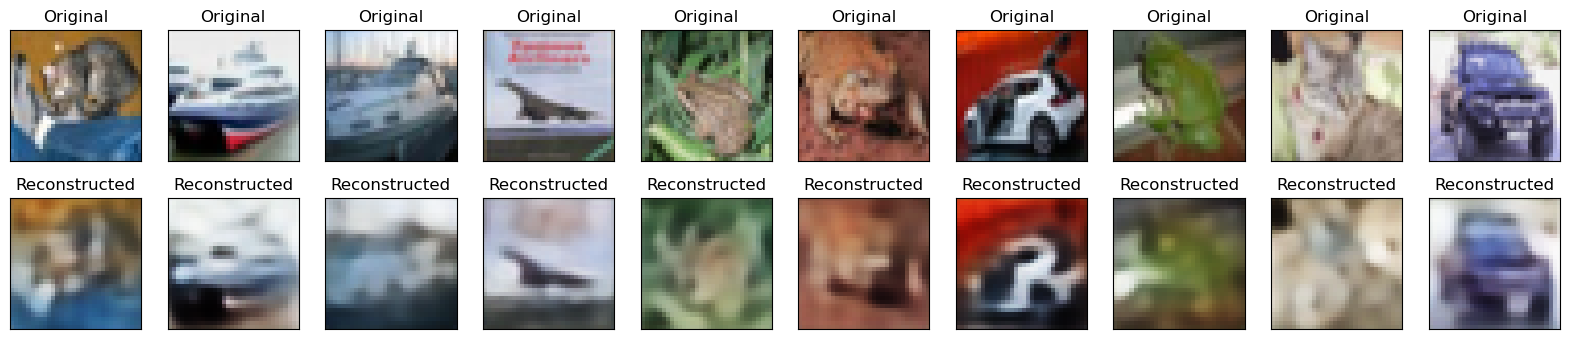

In [259]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [269]:
encoded_imgs = encoder.predict(x_test)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


C:\Users\SMART\AppData\Local\Temp\ipykernel_34612\126294839.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_result[:, 0], pca_result[:, 1], cmap='viridis')


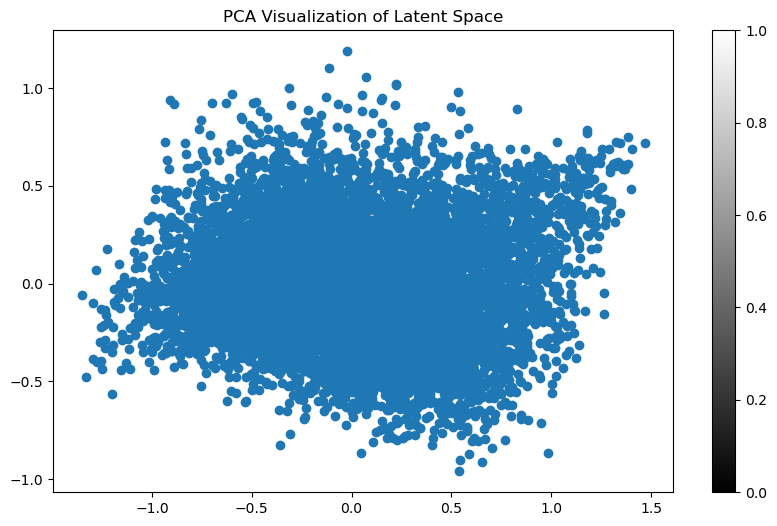

In [270]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], cmap='viridis')
plt.colorbar()
plt.title('PCA Visualization of Latent Space')
plt.show()